# DBSCAN from scratch

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Algorithm
**Input:**  
- `X`: an array of shape `(N,d)` whose rows are samples and columns are features
- `eps`: the $\epsilon$ used for finding neighborhood
- `min_samples`: a sample is considered as a core sample if its $\epsilon$-ball contains at least `min_sample` samples (including itself)
- `draw`: boolean, return a illustrative figure or not

**Output:**  
A tuple `(y_new, core_indices, fig)`  or `(y_new, core_indices)` depending on `draw` or not.    
- `y_new`: an array of shape `(N,)` that records the labels in of each sample, where `-1` stands for a noise 
- `core_indices`: an array of shape `(n_core_samples,)` that stores the indices of the core samples
- `fig`: an illustrative figure showing the data points, DFS tree, core samples, and noises

**Steps:**
1. Build a list `nbrhoods` whose `i`-th element is the array of the indices of its neighbors.  
Here two points are neighbors if the distance between them is less than or equal to `eps` .  
A point is considered as its neighbor.
2. If sample `i` has at least `min_samples` neighbors, then it is called a core sample.  
Store the indices of core samples in the array `core_indices` .
3. Set `label_num = 0`.  Label every sample as with `-1`.  For each sample `i`, do the following [DFS](https://en.wikipedia.org/wiki/Depth-first_search):
    1. if sample `i` is a core labeled by `-1`, label it with `label_num`; otherwise, skip the following steps and move on the the next sample.
    2. let `stack = [i]`
    3. take (and remove) the last element `j` in `stack`
    4. if `j` is labeled by `-1`, label it with `label_num`; moreover, if `j` is a core, insert the neighbors of `j` at the end of `stack`  
    5. repeat Steps C, D, E until `stack` is empty
    6. `label_num += 1`

## Pseudocode
Translate the algorithm into the pseudocode.  
This helps you to identify the parts that you don't know how to do it.  

    1. 
    2. 
    3. ...

## Code

In [ ]:
def dist_mtx(X,Y):
  X = X[:,np.newaxis,:]
  Y = Y[np.newaxis,:,:]
  difference = X-Y #回傳列跟列之間的差
  dist = np.linalg.norm(difference,axis=2) #算每列的範數 => 形成列與列的距離矩陣
  return dist

In [ ]:
#以這個程式碼為主
def DBSCAN_fucntion(X,eps=0.5,min_samples=10):
  dist = dist_mtx(X,X) #X列與列間的距離矩陣
  verify_friend_mtx = (dist<eps)#bool矩陣,若dist對應元素<eps,則為TRUE,否則為FALSE
  core_list = (verify_friend_mtx.sum(axis=1)>=min_samples) #bool矩陣,若adj矩陣之列和>=min_samp為TRUE,否則為FALSE , 意義是檢驗哪一個是core
                                #(adj.sum(axis=1))累加ADJ的每一列,結果顯示每列有幾個元素是TRUE的

  core_indices_list = []
  for j in range(X.shape[0]): 
   if(core_list[j]==True):
    core_indices_list.append(j)
  core_indices = np.array(core_indices_list)  


  nbrhoods = []
  for i in range(X.shape[0]):
       row_vec = verify_friend_mtx[i]
       select_friend = np.where(row_vec)[0]
       nbrhoods.append(select_friend)
  
  y_new = -np.ones((X.shape[0],),dtype=int) 
  label_num = 0

  for ind in range(X.shape[0]):
     if(core_list[ind]==True and y_new[ind]==-1):
       stack = [ind]
       while(stack!=[]):
         j = stack.pop()
         if(y_new[j]==-1):
          y_new[j] = label_num
          if(core_list[j]==True):
            stack.extend(nbrhoods[j])

       label_num = label_num +1
    
            
  return y_new,core_indices      


In [ ]:
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])

In [ ]:
def DBSCAN(X,eps=5,min_samples=10,draw=2):
  y_new,core_indices = DBSCAN_fucntion(X,eps,min_samples)
  #畫圖
  if(X.shape[1]==draw and draw==2):
   plt.scatter(*X[:,:draw].T,c=y_new)
   plt.scatter(*X[core_indices,:draw].T,c="r",s=10) #core
   plt.scatter(*X[y_new==-1,:draw].T,c="k",s=100,marker="+") #noise

  else:
    print("只支援二維點坐標模擬")

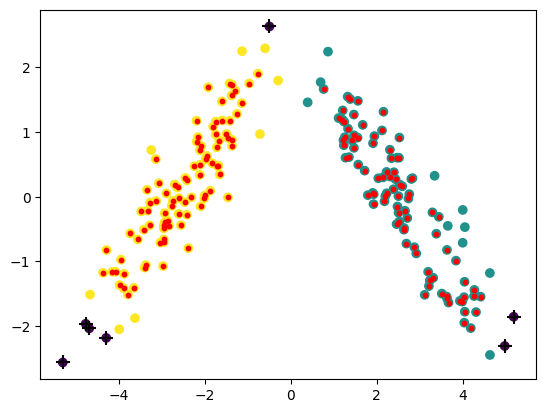

In [ ]:
DBSCAN(X,eps=0.75,min_samples=10,draw=2)

In [ ]:
def DBSCAN_fucntion(X,eps=0.5,min_samples=10):
    dist = dist_mtx(X,X) #X列與列間的距離矩陣
    adjacent = (dist<eps) #bool矩陣,若dist對應元素<eps,則為TRUE,否則為FALSE
    core_mask = (adjacent.sum(axis=1)>=min_samples) #bool矩陣,若adj矩陣之列和>=min_samp為TRUE,否則為FALSE , 意義是檢驗哪一個是core
                              #(adj.sum(axis=1))累加ADJ的每一列,結果顯示每列有幾個元素是TRUE的
    core_indices = np.where(core_mask)[0]      #回傳core的指標(用列去看,假設是0,那代表第一列是core)
    
    nbrhoods = []                   #蒐集與第1,...,X.shape[0]列的friend列,然後把對應的friend指標列 列印出來
    for i in range(X.shape[0]):
       row_vec = adjacent[i]
       select_friend = np.where(row_vec)[0]
       nbrhoods.append(select_friend)

    label_num = 0
    y_new = -np.ones((X.shape[0],),dtype=int)
    
    for ind in range(X.shape[0]):
     if(core_mask[ind]==True and y_new[ind]==-1):
       stack = [ind]
       while(stack!=[]):
         j = stack.pop()
         if(y_new[j]==-1):
          y_new[j] = label_num
          if(core_mask[j]==True):
            stack.extend(nbrhoods[j])

       label_num = label_num +1
    
            
    return y_new,core_indices





In [ ]:
ind = 0
stack=[ind]
j= stack.pop()
stack
j
nbrhoods = [np.array([0, 1]), np.array([0, 1, 4]), np.array([2]), np.array([3, 4]), np.array([1, 3, 4])] 
stack.extend(nbrhoods[j])
stack

[0, 1]

In [ ]:
DBSCAN_fucntion(X,4,2)

(array([ 0,  0, -1,  0,  0]), array([0, 1, 3, 4]))

In [ ]:
stack = -np.ones((X.shape[0],),dtype=int) 
stack


array([-1, -1, -1, -1, -1])

In [ ]:
eps = 4
sample = 2
X = np.array([[1,3,5],[2,4,6],[3,2,1],[4,7,9],[5,5,8]])
dist = dist_mtx(X,X)

print(dist,"\n")
adj = (dist<eps)
print(adj,"\n")
core_mask = (adj.sum(axis=1))
core_mask1 = (adj.sum(axis=1)>=sample)
print(core_mask,"\n")
print(core_mask1,"\n")
core_indices = np.where(core_mask1)[0]
print(core_indices,"\n")
print(core_indices,"\n")
#nbrhoods = [np.where(adj[i])[0] for i in range(X.shape[0])]

nbrhoods = []                   #蒐集與第1,...,X.shape[0]列的friend列,然後把對應的friend指標列 列印出來
for i in range(X.shape[0]):
       row_vec = adj[i]
       select_friend = np.where(row_vec)[0]
       nbrhoods.append(select_friend)
print(nbrhoods,"\n")

nbrhoods1 = []
for j in range(X.shape[0]):
    row_sel = np.where(adj[j]==True)
    nbrhoods.append(row_sel)
print(nbrhoods1,"\n") 
np.where(adj)[0]   

[[0.         1.73205081 4.58257569 6.40312424 5.38516481]
 [1.73205081 0.         5.47722558 4.69041576 3.74165739]
 [4.58257569 5.47722558 0.         9.48683298 7.87400787]
 [6.40312424 4.69041576 9.48683298 0.         2.44948974]
 [5.38516481 3.74165739 7.87400787 2.44948974 0.        ]] 

[[ True  True False False False]
 [ True  True False False  True]
 [False False  True False False]
 [False False False  True  True]
 [False  True False  True  True]] 

[2 3 1 2 3] 

[ True  True False  True  True] 

[0 1 3 4] 

[0 1 3 4] 

[array([0, 1]), array([0, 1, 4]), array([2]), array([3, 4]), array([1, 3, 4])] 

[] 



array([0, 0, 1, 1, 1, 2, 3, 3, 4, 4, 4])

In [ ]:
adj[1]

array([ True,  True, False, False,  True])

In [ ]:
type(core_indices)

numpy.ndarray

In [ ]:
core_mask1[0]==True

True

In [ ]:
DBSCAN(X,eps=4,min_samples=2)

(array([ 0,  0, -1,  0,  0]), array([0, 1, 3, 4]))

In [ ]:
DBSCAN_(X,eps=4,min_samples=2)

(array([ 0,  0, -1,  0,  0]), array([0, 1, 3, 4]))

In [ ]:
core_mask1[0]

True

In [ ]:
nbrhoods = []
for i in range(X.shape[0]):
   row_vec = adj[i]
   select_friend = np.where(row_vec)[0]
   nbrhoods.append(select_friend)

nbrhoods   

[array([0, 1]), array([0, 1, 4]), array([2]), array([3, 4]), array([1, 3, 4])]

## Test
Take some sample data from [DBSCAN-with-scikit-learn](DBSCAN-with-scikit-learn.ipynb) and check if your code generates similar outputs with the existing packages.

##### Name of the data
Description of the data.

In [ ]:
### results with your code

In [ ]:
### results with existing packages

## Comparison

In [ ]:
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)]) #(200,2)

In [ ]:
#algorithm function
y_my,core_indices = DBSCAN_fucntion(X,eps=0.5,min_samples=10)


In [ ]:
#package
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.5,min_samples = 10)
y_new = model.fit_predict(X)

##### Exercise 1
With the same `eps` and `min_samples`, the array `core_indices` generated by your function is supposed to be the same as `model.core_sample_indices_` .  
Check if this is true.

In [ ]:
np.all(core_indices==model.core_sample_indices_) #對

True

##### Exercise 2
Let `core_indices` be the array generated by your function.  
Then `X[core_indices]` is supposed to be the same as `model.components_` .  
Check if this is true.

In [ ]:
np.all(X[core_indices]==model.components_) #對

True

##### Exercise 3
Let `y_my` be the output label of your function.  
Let `y_new` be the label given by `sklearn.cluster.DBSCAN` .

###### 3(a)
The noices `y_my == -1` and `y_new == -1` are supposed to be the same.  
Check if this is true.

In [ ]:
np.all((y_new == -1)==(y_my == -1)) #對

True

###### 3(b)
Although `y_my` and `y_new` might be different, they indicate the same clustering.  
That is, the partitions are the same, but a group my have different labels in `y_my` and `y_new` .  
Check if this is true.

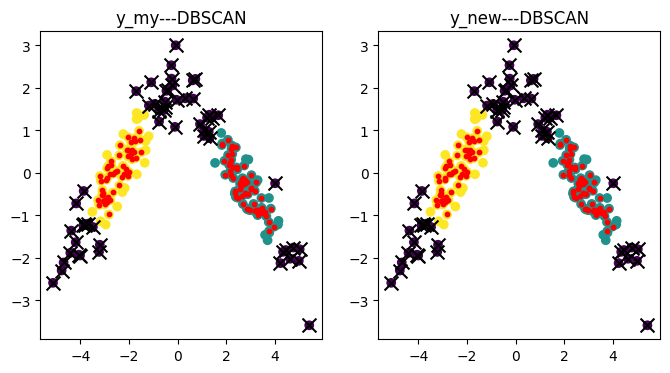

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title("y_my---DBSCAN")
axs[0].scatter(X[:,0],X[:,1],c=y_my)
axs[0].scatter(X[core_indices,0],X[core_indices,1],c="r",s=10)
axs[0].scatter(X[y_my==-1,0],X[y_my==-1,1],c="k",s=100,marker="x")
axs[1].set_title("y_new---DBSCAN")
axs[1].scatter(X[:,0],X[:,1],c=y_new)
axs[1].scatter(X[model.core_sample_indices_,0],X[model.core_sample_indices_,1],c="r",s=10)
axs[1].scatter(X[y_new==-1,0],X[y_new==-1,1],c="k",s=100,marker="x")